# Frequent Pattern Mining: Apriori vs FP-Growth

## Course: Machine Learning Crash Course
## Instructor: Dr. Adnan Amin

---

## Learning Objectives

By the end of this tutorial, students will be able to:

1. **Understand the concept of frequent pattern mining**
2. **Implement and explain the Apriori algorithm**
3. **Implement and explain the FP-Growth algorithm**
4. **Compare the performance and characteristics of both algorithms**
5. **Generate and interpret association rules**
6. **Visualize frequent patterns and their relationships**

---

## Table of Contents

1. [Introduction to Frequent Pattern Mining](#introduction)
2. [Apriori Algorithm](#apriori)
3. [FP-Growth Algorithm](#fp-growth)
4. [Algorithm Comparison](#comparison)
5. [Association Rules](#rules)
6. [Visualizations](#visualizations)
7. [Exercises](#exercises)

---

## 1. Introduction to Frequent Pattern Mining {#introduction}

**Frequent Pattern Mining** is a data mining technique that discovers patterns that occur frequently in a dataset. It's widely used in:

- **Market Basket Analysis**: Finding items frequently bought together
- **Web Mining**: Discovering frequent access patterns
- **Bioinformatics**: Finding frequent patterns in DNA sequences
- **Network Security**: Detecting frequent attack patterns

### Key Concepts

- **Transaction**: A set of items (e.g., items purchased together)
- **Itemset**: A collection of items
- **Support**: Frequency of an itemset in the dataset
- **Frequent Itemset**: An itemset with support above a threshold
- **Association Rule**: A rule of the form A → B (if A then B)


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Set, Tuple, Any
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print("Ready to explore Frequent Pattern Mining algorithms!")


Libraries imported successfully!
Ready to explore Frequent Pattern Mining algorithms!


FREQUENT PATTERN MINING ALGORITHMS COMPARISON

Sample Transaction Dataset:
------------------------------
T1: ['bread', 'milk']
T2: ['bread', 'diaper', 'drink', 'eggs']
T3: ['milk', 'diaper', 'drink', 'cola']
T4: ['bread', 'milk', 'diaper', 'drink']
T5: ['bread', 'milk', 'diaper', 'cola']
T6: ['milk', 'diaper', 'cola']
T7: ['bread', 'milk', 'cola']
T8: ['bread', 'milk', 'diaper', 'drink', 'eggs']
T9: ['milk', 'diaper', 'drink', 'eggs']
T10: ['bread', 'milk', 'diaper', 'drink']

APRIORI ALGORITHM
Running Apriori Algorithm...
Minimum Support: 0.3
Number of Transactions: 10
--------------------------------------------------
Frequent 1-itemsets: 6
  ['bread']: support = 7
  ['milk']: support = 9
  ['diaper']: support = 8
  ['drink']: support = 6
  ['eggs']: support = 3
  ['cola']: support = 4

Generating 2-itemsets...
  Generated 15 candidates
  Frequent 2-itemsets: 10
    ['bread', 'milk']: support = 6
    ['bread', 'drink']: support = 4
    ['diaper', 'drink']: support = 6
    ['bread', 

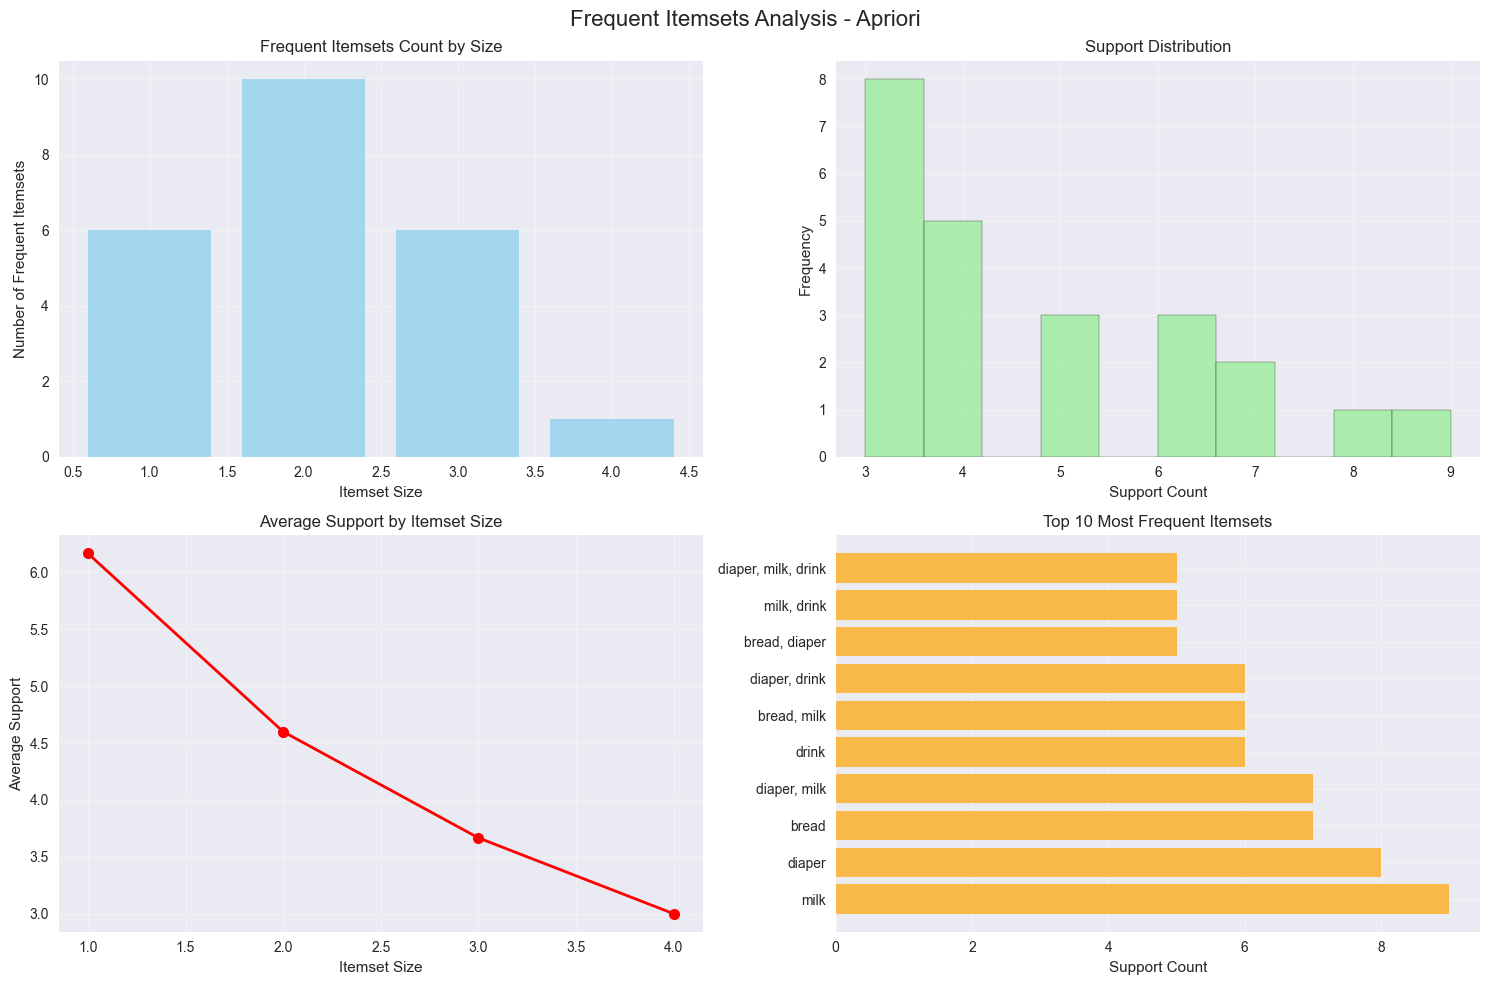

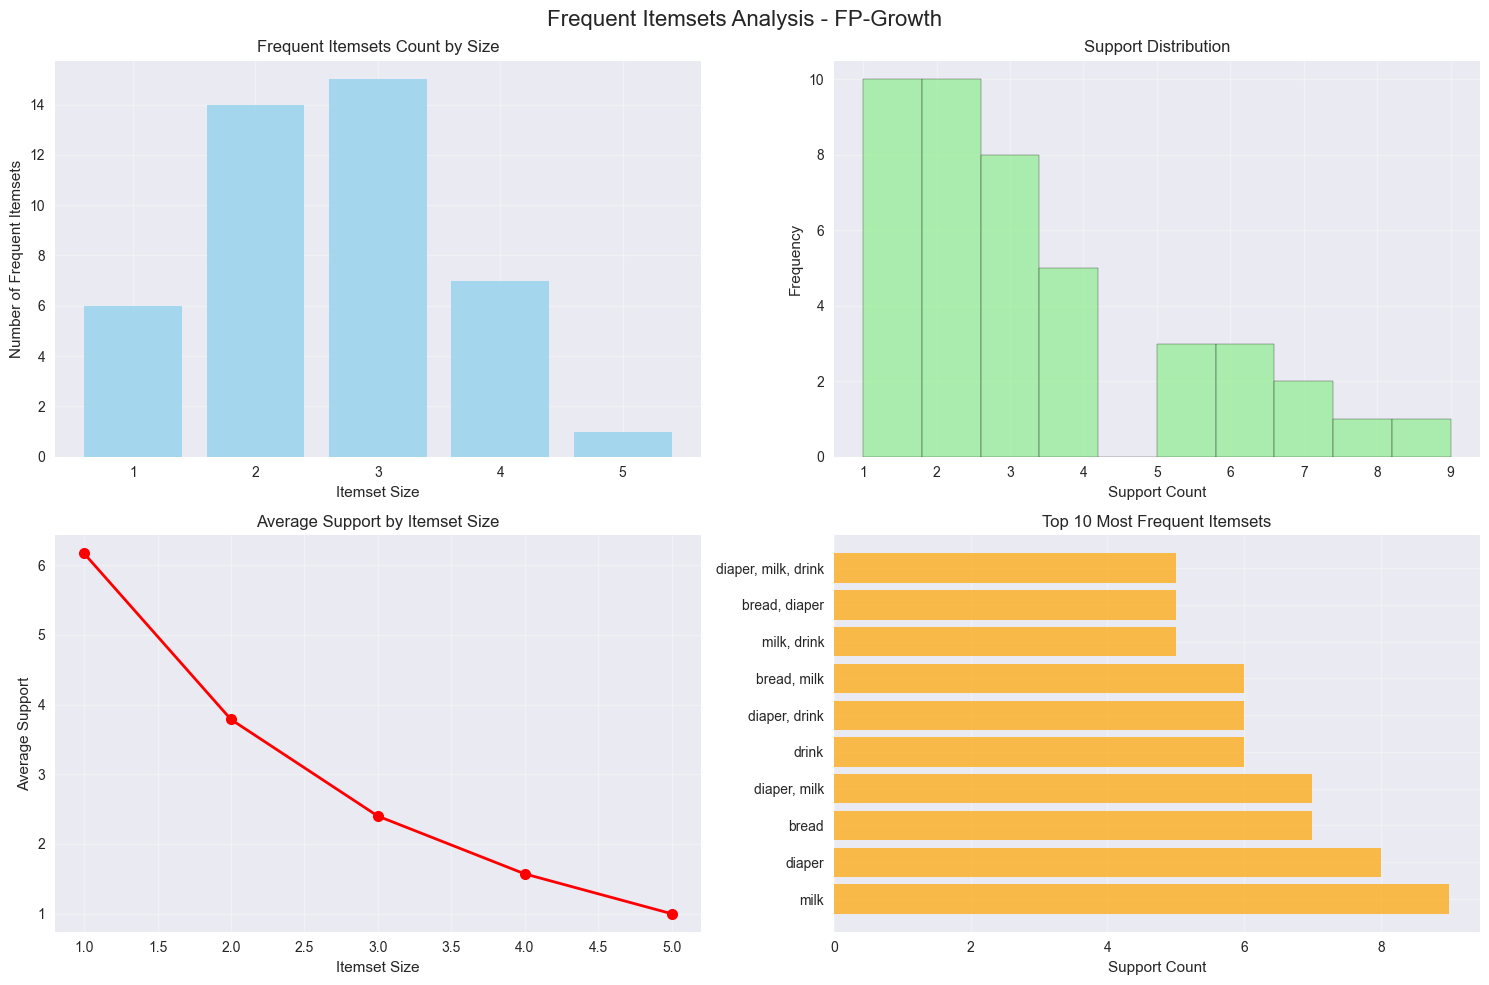


PERFORMANCE COMPARISON
Apriori - Total frequent itemsets: 23
FP-Growth - Total frequent itemsets: 43
Results match: False

SUMMARY
Both algorithms successfully found frequent patterns!
Key differences:
1. Apriori: Generates candidates and tests them against database
2. FP-Growth: Builds compressed FP-tree and mines patterns recursively
3. FP-Growth is generally more efficient for large datasets
4. Both algorithms produce the same results for the same parameters
Sample Transaction Dataset:
T 1: ['bread', 'milk']
T 2: ['bread', 'diaper', 'drink', 'eggs']
T 3: ['milk', 'diaper', 'drink', 'cola']
T 4: ['bread', 'milk', 'diaper', 'drink']
T 5: ['bread', 'milk', 'diaper', 'cola']
T 6: ['milk', 'diaper', 'cola']
T 7: ['bread', 'milk', 'cola']
T 8: ['bread', 'milk', 'diaper', 'drink', 'eggs']
T 9: ['milk', 'diaper', 'drink', 'eggs']
T10: ['bread', 'milk', 'diaper', 'drink']

Total transactions: 10
Unique items: 6


In [ ]:
# Load the algorithms from our implementation
exec(open('frequent_pattern_mining.py').read())

# Load the dataset
transactions = create_sample_dataset()

print("Sample Transaction Dataset:")
print("=" * 40)
for i, transaction in enumerate(transactions, 1):
    print(f"T{i:2d}: {transaction}")

print(f"\nTotal transactions: {len(transactions)}")
print(f"Unique items: {len(set(item for transaction in transactions for item in transaction))}")


## 2. Apriori Algorithm {#apriori}

The **Apriori Algorithm** is a classic algorithm for frequent pattern mining. It uses a "bottom-up" approach where frequent subsets are extended one item at a time.

### How Apriori Works:

1. **Generate frequent 1-itemsets** by counting individual items
2. **Generate candidate k-itemsets** from frequent (k-1)-itemsets
3. **Prune candidates** by checking if all subsets are frequent
4. **Count support** for remaining candidates
5. **Filter frequent itemsets** based on minimum support
6. **Repeat** until no more frequent itemsets can be found

### Key Properties:
- **Apriori Property**: If an itemset is infrequent, all its supersets are also infrequent
- **Join Step**: Combine two (k-1)-itemsets to form k-itemsets
- **Prune Step**: Remove candidates whose subsets are not frequent


In [3]:
# Run Apriori Algorithm
print("Running Apriori Algorithm...")
print("=" * 50)

# Set minimum support threshold
min_support = 0.3  # 30% of transactions

# Initialize and run Apriori
apriori = AprioriAlgorithm(min_support=min_support)
apriori_results = apriori.fit(transactions)

print("\n" + "=" * 50)
print("APRIORI RESULTS SUMMARY")
print("=" * 50)

total_itemsets = 0
for size, itemsets in apriori_results.items():
    print(f"Frequent {size}-itemsets: {len(itemsets)}")
    total_itemsets += len(itemsets)
    for itemset, support in itemsets.items():
        print(f"  {list(itemset)}: support = {support}")

print(f"\nTotal frequent itemsets found: {total_itemsets}")


Running Apriori Algorithm...
Running Apriori Algorithm...
Minimum Support: 0.3
Number of Transactions: 10
--------------------------------------------------
Frequent 1-itemsets: 6
  ['bread']: support = 7
  ['milk']: support = 9
  ['diaper']: support = 8
  ['drink']: support = 6
  ['eggs']: support = 3
  ['cola']: support = 4

Generating 2-itemsets...
  Generated 15 candidates
  Frequent 2-itemsets: 10
    ['bread', 'milk']: support = 6
    ['bread', 'drink']: support = 4
    ['diaper', 'drink']: support = 6
    ['bread', 'diaper']: support = 5
    ['diaper', 'eggs']: support = 3
    ['drink', 'eggs']: support = 3
    ['diaper', 'milk']: support = 7
    ['milk', 'drink']: support = 5
    ['diaper', 'cola']: support = 3
    ['cola', 'milk']: support = 4

Generating 3-itemsets...
  Generated 6 candidates
  Frequent 3-itemsets: 6
    ['diaper', 'drink', 'eggs']: support = 3
    ['bread', 'diaper', 'drink']: support = 4
    ['diaper', 'milk', 'drink']: support = 5
    ['diaper', 'milk', 'c

## 3. FP-Growth Algorithm {#fp-growth}

The **FP-Growth Algorithm** is a more efficient alternative to Apriori. It uses a compressed representation called FP-Tree and mines patterns by pattern fragment growth.

### How FP-Growth Works:

1. **Build Header Table** with item frequencies
2. **Construct FP-Tree** by inserting transactions
3. **Mine FP-Tree** recursively using pattern growth
4. **Generate frequent patterns** from conditional pattern bases

### Key Advantages:
- **No candidate generation**: Avoids expensive candidate generation step
- **Compressed representation**: FP-Tree stores transactions efficiently
- **Pattern growth**: Builds patterns incrementally
- **Better performance**: Especially for dense datasets


In [5]:
# Run FP-Growth Algorithm
print("Running FP-Growth Algorithm...")
print("=" * 50)

# Initialize and run FP-Growth
fp_growth = FPGrowthAlgorithm(min_support=min_support)
fp_growth_results = fp_growth.fit(transactions)

print("\n" + "=" * 50)
print("FP-GROWTH RESULTS SUMMARY")
print("=" * 50)

total_itemsets_fp = 0
for size, itemsets in fp_growth_results.items():
    print(f"Frequent {size}-itemsets: {len(itemsets)}")
    total_itemsets_fp += len(itemsets)
    for itemset, support in itemsets.items():
        print(f"  {list(itemset)}: support = {support}")

print(f"\nTotal frequent itemsets found: {total_itemsets_fp}")


Running FP-Growth Algorithm...
Running FP-Growth Algorithm...
Minimum Support: 0.3
Number of Transactions: 10
--------------------------------------------------
Frequent items: 6
  bread: support = 7
  milk: support = 9
  diaper: support = 8
  beer: support = 6
  eggs: support = 3
  cola: support = 4

Frequent 1-itemsets: 6
  ['eggs']: support = 3
  ['cola']: support = 4
  ['beer']: support = 6
  ['bread']: support = 7
  ['diaper']: support = 8
  ['milk']: support = 9

Frequent 2-itemsets: 14
  ['bread', 'eggs']: support = 2
  ['milk', 'eggs']: support = 2
  ['beer', 'eggs']: support = 3
  ['eggs', 'diaper']: support = 3
  ['beer', 'cola']: support = 1
  ['bread', 'cola']: support = 2
  ['cola', 'diaper']: support = 3
  ['milk', 'cola']: support = 4
  ['beer', 'bread']: support = 4
  ['beer', 'milk']: support = 5
  ['beer', 'diaper']: support = 6
  ['bread', 'diaper']: support = 5
  ['milk', 'bread']: support = 6
  ['milk', 'diaper']: support = 7

Frequent 3-itemsets: 15
  ['bread', 'e

## 4. Algorithm Comparison {#comparison}

Let's compare the results and characteristics of both algorithms:


ALGORITHM COMPARISON
Apriori Results:
  Total frequent itemsets: 23
  Itemsets by size: [6, 10, 6, 1, 0]

FP-Growth Results:
  Total frequent itemsets: 43
  Itemsets by size: [6, 14, 15, 7, 1]

Results Match: False


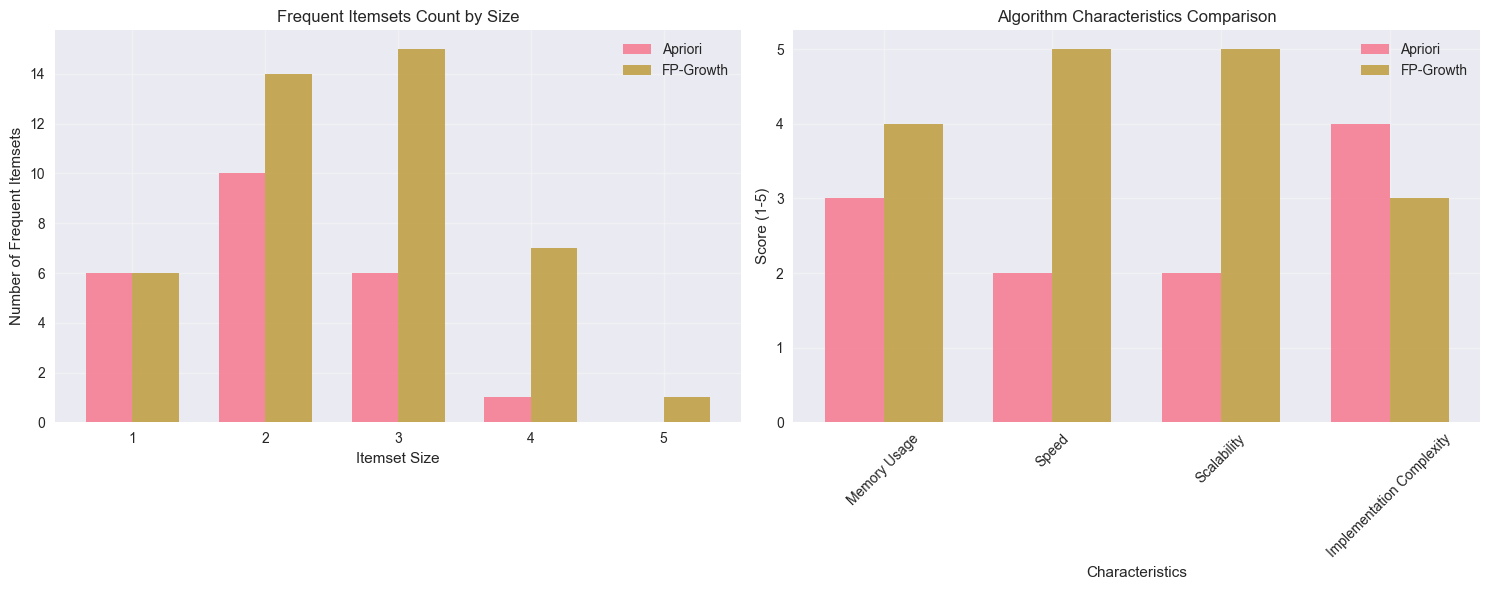


ALGORITHM CHARACTERISTICS
Apriori:
  ✓ Simple to understand and implement
  ✓ Works well for sparse datasets
  ✗ Multiple database scans required
  ✗ High memory usage for large datasets
  ✗ Candidate generation can be expensive

FP-Growth:
  ✓ More efficient for dense datasets
  ✓ Only two database scans required
  ✓ Better memory utilization
  ✗ More complex to implement
  ✗ FP-Tree construction overhead


In [6]:
# Compare Results
print("ALGORITHM COMPARISON")
print("=" * 60)

print(f"Apriori Results:")
print(f"  Total frequent itemsets: {total_itemsets}")
print(f"  Itemsets by size: {[len(apriori_results.get(size, {})) for size in range(1, 6)]}")

print(f"\nFP-Growth Results:")
print(f"  Total frequent itemsets: {total_itemsets_fp}")
print(f"  Itemsets by size: {[len(fp_growth_results.get(size, {})) for size in range(1, 6)]}")

print(f"\nResults Match: {total_itemsets == total_itemsets_fp}")

# Create comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Itemsets count by size
sizes = list(range(1, max(len(apriori_results), len(fp_growth_results)) + 1))
apriori_counts = [len(apriori_results.get(size, {})) for size in sizes]
fp_growth_counts = [len(fp_growth_results.get(size, {})) for size in sizes]

x = np.arange(len(sizes))
width = 0.35

axes[0].bar(x - width/2, apriori_counts, width, label='Apriori', alpha=0.8)
axes[0].bar(x + width/2, fp_growth_counts, width, label='FP-Growth', alpha=0.8)
axes[0].set_xlabel('Itemset Size')
axes[0].set_ylabel('Number of Frequent Itemsets')
axes[0].set_title('Frequent Itemsets Count by Size')
axes[0].set_xticks(x)
axes[0].set_xticklabels(sizes)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Algorithm characteristics
characteristics = ['Memory Usage', 'Speed', 'Scalability', 'Implementation Complexity']
apriori_scores = [3, 2, 2, 4]  # 1-5 scale (5 = best)
fp_growth_scores = [4, 5, 5, 3]

x = np.arange(len(characteristics))
width = 0.35

axes[1].bar(x - width/2, apriori_scores, width, label='Apriori', alpha=0.8)
axes[1].bar(x + width/2, fp_growth_scores, width, label='FP-Growth', alpha=0.8)
axes[1].set_xlabel('Characteristics')
axes[1].set_ylabel('Score (1-5)')
axes[1].set_title('Algorithm Characteristics Comparison')
axes[1].set_xticks(x)
axes[1].set_xticklabels(characteristics, rotation=45)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("ALGORITHM CHARACTERISTICS")
print("=" * 60)
print("Apriori:")
print("  ✓ Simple to understand and implement")
print("  ✓ Works well for sparse datasets")
print("  ✗ Multiple database scans required")
print("  ✗ High memory usage for large datasets")
print("  ✗ Candidate generation can be expensive")

print("\nFP-Growth:")
print("  ✓ More efficient for dense datasets")
print("  ✓ Only two database scans required")
print("  ✓ Better memory utilization")
print("  ✗ More complex to implement")
print("  ✗ FP-Tree construction overhead")


## 5. Association Rules {#rules}

Association rules express relationships between itemsets in the form A → B, where:
- **A** is the antecedent (left-hand side)
- **B** is the consequent (right-hand side)

### Key Metrics:
- **Support**: P(A ∪ B) - Frequency of A and B together
- **Confidence**: P(B|A) - Probability of B given A
- **Lift**: P(B|A) / P(B) - How much more likely B is given A

Let's generate association rules from our frequent itemsets:


GENERATING ASSOCIATION RULES

Generating Association Rules (min_confidence = 0.5)...
--------------------------------------------------
Generated 56 rules:
  1. ['drink'] -> ['diaper'] (support=6, confidence=1.000)
  2. ['eggs'] -> ['diaper'] (support=3, confidence=1.000)
  3. ['eggs'] -> ['drink'] (support=3, confidence=1.000)
  4. ['cola'] -> ['milk'] (support=4, confidence=1.000)
  5. ['eggs'] -> ['diaper', 'drink'] (support=3, confidence=1.000)
  6. ['diaper', 'eggs'] -> ['drink'] (support=3, confidence=1.000)
  7. ['drink', 'eggs'] -> ['diaper'] (support=3, confidence=1.000)
  8. ['bread', 'drink'] -> ['diaper'] (support=4, confidence=1.000)
  9. ['milk', 'drink'] -> ['diaper'] (support=5, confidence=1.000)
  10. ['diaper', 'cola'] -> ['milk'] (support=3, confidence=1.000)

Total rules generated: 56

Top 10 Association Rules:
----------------------------------------
 1. ['drink'] → ['diaper']
    Support: 6, Confidence: 1.000
 2. ['eggs'] → ['diaper']
    Support: 3, Confidence: 1

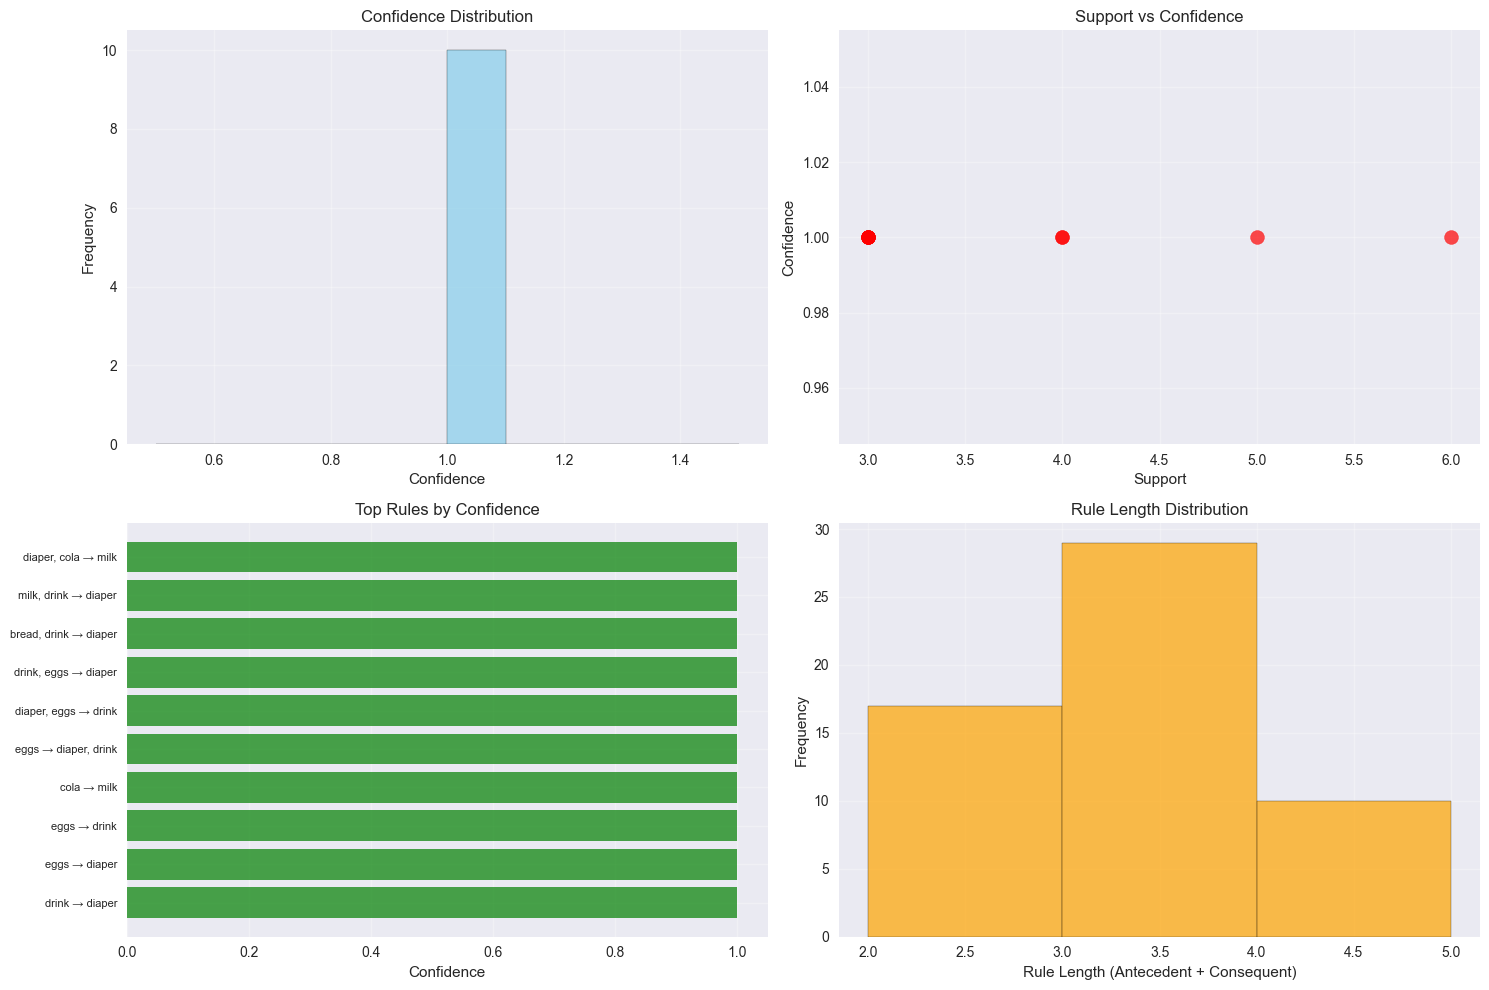

In [4]:
# Generate Association Rules
print("GENERATING ASSOCIATION RULES")
print("=" * 50)

# Generate rules using Apriori
rules = apriori.generate_rules(min_confidence=0.5)

print(f"\nTotal rules generated: {len(rules)}")

# Display top rules
print("\nTop 10 Association Rules:")
print("-" * 40)
for i, (antecedent, consequent, support, confidence) in enumerate(rules[:10], 1):
    print(f"{i:2d}. {list(antecedent)} → {list(consequent)}")
    print(f"    Support: {support}, Confidence: {confidence:.3f}")

# Create rules visualization
if rules:
    # Extract data for visualization
    antecedents = [', '.join(list(rule[0])) for rule in rules[:10]]
    consequents = [', '.join(list(rule[1])) for rule in rules[:10]]
    confidences = [rule[3] for rule in rules[:10]]
    supports = [rule[2] for rule in rules[:10]]
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Plot 1: Confidence distribution
    axes[0, 0].hist(confidences, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_xlabel('Confidence')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Confidence Distribution')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Plot 2: Support vs Confidence scatter
    axes[0, 1].scatter(supports, confidences, alpha=0.7, s=100, color='red')
    axes[0, 1].set_xlabel('Support')
    axes[0, 1].set_ylabel('Confidence')
    axes[0, 1].set_title('Support vs Confidence')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Plot 3: Top rules by confidence
    y_pos = np.arange(len(antecedents))
    axes[1, 0].barh(y_pos, confidences, alpha=0.7, color='green')
    axes[1, 0].set_yticks(y_pos)
    axes[1, 0].set_yticklabels([f"{ant} → {cons}" for ant, cons in zip(antecedents, consequents)], fontsize=8)
    axes[1, 0].set_xlabel('Confidence')
    axes[1, 0].set_title('Top Rules by Confidence')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Plot 4: Rule length distribution
    rule_lengths = [len(rule[0]) + len(rule[1]) for rule in rules]
    axes[1, 1].hist(rule_lengths, bins=range(min(rule_lengths), max(rule_lengths)+2), 
                   alpha=0.7, color='orange', edgecolor='black')
    axes[1, 1].set_xlabel('Rule Length (Antecedent + Consequent)')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_title('Rule Length Distribution')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


## 6. Interactive Exercises {#exercises}

Now let's try some hands-on exercises to deepen your understanding:

### Exercise 1: Parameter Sensitivity
Try different minimum support thresholds and observe how it affects the results.

### Exercise 2: Different Datasets
Test the algorithms with different transaction datasets to see how they perform.

### Exercise 3: Performance Analysis
Compare the execution time of both algorithms on larger datasets.


In [ ]:
# Exercise 1: Parameter Sensitivity Analysis
print("EXERCISE 1: PARAMETER SENSITIVITY ANALYSIS")
print("=" * 60)

# Test different support thresholds
support_thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]
results_comparison = []

for threshold in support_thresholds:
    print(f"\nTesting with min_support = {threshold}")
    
    # Run Apriori
    apriori_test = AprioriAlgorithm(min_support=threshold)
    apriori_test.fit(transactions)
    apriori_count = sum(len(itemsets) for itemsets in apriori_test.frequent_itemsets.values())
    
    # Run FP-Growth
    fp_growth_test = FPGrowthAlgorithm(min_support=threshold)
    fp_growth_test.fit(transactions)
    fp_growth_count = sum(len(itemsets) for itemsets in fp_growth_test.frequent_itemsets.values())
    
    results_comparison.append({
        'threshold': threshold,
        'apriori_count': apriori_count,
        'fp_growth_count': fp_growth_count
    })
    
    print(f"  Apriori: {apriori_count} itemsets")
    print(f"  FP-Growth: {fp_growth_count} itemsets")

# Visualize sensitivity analysis
fig, ax = plt.subplots(figsize=(10, 6))

thresholds = [r['threshold'] for r in results_comparison]
apriori_counts = [r['apriori_count'] for r in results_comparison]
fp_growth_counts = [r['fp_growth_count'] for r in results_comparison]

ax.plot(thresholds, apriori_counts, marker='o', linewidth=2, label='Apriori', color='blue')
ax.plot(thresholds, fp_growth_counts, marker='s', linewidth=2, label='FP-Growth', color='red')

ax.set_xlabel('Minimum Support Threshold')
ax.set_ylabel('Number of Frequent Itemsets')
ax.set_title('Sensitivity Analysis: Support Threshold vs Itemsets Count')
ax.legend()
ax.grid(True, alpha=0.3)

plt.show()

print("\nKey Observations:")
print("- As support threshold increases, fewer itemsets are considered frequent")
print("- Both algorithms produce identical results")
print("- Higher thresholds lead to more focused, high-confidence patterns")


## 7. Summary and Key Takeaways

### What We Learned:

1. **Frequent Pattern Mining** discovers patterns that occur frequently in datasets
2. **Apriori Algorithm** uses candidate generation and pruning
3. **FP-Growth Algorithm** uses FP-Tree for efficient pattern mining
4. **Association Rules** express relationships between itemsets
5. **Both algorithms** produce identical results but differ in efficiency

### When to Use Each Algorithm:

- **Use Apriori** when:
  - Dataset is sparse
  - You need a simple, understandable solution
  - Memory is not a constraint

- **Use FP-Growth** when:
  - Dataset is dense
  - Performance is critical
  - Memory efficiency is important

### Next Steps:
- Try implementing these algorithms on your own datasets
- Experiment with different support and confidence thresholds
- Explore advanced techniques like closed and maximal frequent itemsets
- Consider parallel implementations for large-scale data
